# Library Imports:

In [610]:
import sys
print(sys.executable)
print(sys.version)

/usr/local/bin/python3
3.12.8 (v3.12.8:2dc476bcb91, Dec  3 2024, 14:43:19) [Clang 13.0.0 (clang-1300.0.29.30)]


In [611]:
import sys
!{sys.executable} -m pip install pandas numpy seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [612]:
import subprocess, sys
subprocess.run([sys.executable, "-m", "pip", "show", "pandas"])

Name: pandas
Version: 3.0.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

 Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
 All rights reserved.

 Copyright (c) 2011-2026, Open source contributors.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contribut

CompletedProcess(args=['/usr/local/bin/python3', '-m', 'pip', 'show', 'pandas'], returncode=0)

In [613]:
# importing the required libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

import logging
import os
from pathlib import Path
from typing import Optional

# Dataset Imports & Initial Exploration:

In [614]:
logger = logging.getLogger(__name__)

class DataIngestor:
    """Handles secure and validated data loading from local files."""
    
    def __init__(self, file_path: Optional[str] = None):
        self.file_path = Path(file_path or os.getenv("DATA_PATH", "data/raw_data.xlsx"))

    def load_excel_data(self, sheet_name: str = 0) -> pd.DataFrame:
        """
        Loads Excel data with error handling and validation.
        """
        logger.info(f"Attempting to load data from: {self.file_path}")

        if not self.file_path.exists():
            error_msg = f"File not found: {self.file_path}"
            logger.error(error_msg)
            raise FileNotFoundError(error_msg)

        try:
            df = pd.read_excel(self.file_path, sheet_name=sheet_name, engine='openpyxl')
            
            if df.empty:
                logger.warning("The loaded dataframe is empty.")
            else:
                logger.info(f"Successfully loaded {len(df)} rows.")
            
            return df

        except Exception as e:
            logger.error(f"Failed to read Excel file: {str(e)}")
            raise


if __name__ == "__main__":
    ingestor = DataIngestor("/Users/yagyansh/Desktop/data-science-accelerator/Lead Data Scientist Pre Work 1.xlsx")
    df = ingestor.load_excel_data()

In [615]:
df = pd.read_excel('/Users/yagyansh/Desktop/data-science-accelerator/Lead Data Scientist Pre Work 1.xlsx')

In [616]:
# inspecting the first few rows of the dataframe and ensuring that all columns are shown

pd.set_option('display.max_columns', None)
df.head(1)

,sale price,Date of Transfer,Property Type,is_new,Duration,town_or_city,District,County,PPD Category Type,Record Status,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,REPORT_TYPE
0,325950,2021-11-25,S,Y,F,SALFORD,SALFORD,GREATER MANCHESTER,A,A,B,A,85,95,House,End-Terrace,2021-11-02,2021-11-02,new dwelling,87,96,76,22.0,1.5,13,0.5,83.0,83.0,246.0,246.0,75.0,48.0,112.0,standard tariff,NaN,NaN,N,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0,From main system,Good,Good,Average thermal transmittance 0.11 W/m-¬¶K,Very Good,Very Good,High performance glazing,Very Good,Very Good,Average thermal transmittance 0.18 W/m-¬¶K,Very Good,Very Good,NaN,NaN,NaN,Average thermal transmittance 0.1 W/m-¬¶K,Very Good,Very Good,"Boiler and radiators, mains gas",Good,Good,Time and temperature zone control,Very Good,Very Good,Low energy lighting in all fixed outlets,Very Good,Very Good,Gas: mains gas,0.0,NaN,NaN,2.338,NaN,NaN,NaN,2021,2021-11-02 12:13:49,Not defined - use in the case of a new dwellin...,10.0,NaN,101


In [617]:
# as we have identified a naming discrepancy and duplication of Property Type variable; we would be renaming it correctly based on the values associated to it
df = df.rename(columns={
    'Property Type': 'property_structure',
    'PROPERTY_TYPE': 'property_category'
})

# lower casing all the column names in a copy of our original dataset
df1 = df.copy()
df1.columns = df1.columns.str.lower().str.replace(' ', '_')

In [618]:
# inspecting the shape of the dataframe 
print(f'The shape of the dataframe before dropping the columns is: {df1.shape[0]} rows and {df1.shape[1]} columns.')

The shape of the dataframe before dropping the columns is: 36936 rows and 88 columns.


## Null Values Exploration:

**Features** that have > 90% missing values won't provide signalk towards predicting the **sale_price**; hence we would be dropping the following variables:

- sheating_energy_eff
- sheating_env_eff
- floor_env_eff
- flat_storey_count

In [619]:
missing_df = pd.DataFrame({
    "missing_count": df1.isnull().sum(),
    "missing_percent": df1.isnull().mean() * 100
})

missing_df.sort_values("missing_percent", ascending=False).head(20)

,missing_count,missing_percent
sheating_energy_eff,36936,100.000000
sheating_env_eff,36936,100.000000
floor_env_eff,36153,97.880117
flat_storey_count,34943,94.604180
floor_energy_eff,32882,89.024258
secondheat_description,29201,79.058371
main_heating_controls,28990,78.487113
unheated_corridor_length,25737,69.679987
low_energy_fixed_light_count,17744,48.039853
flat_top_storey,16772,45.408274


In [620]:
cols_to_drop = ['sheating_energy_eff', 'sheating_env_eff', 'floor_env_eff', 'flat_storey_count']
df1 = df1.drop(cols_to_drop, axis=1)
df1.shape

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36936, 84)


## Zero Variance Feature Exploration:
We removed zero-variance features such as record_status to reduce dimensionality and improve computational efficiency. Additionally we dropped town_or_city and county because it’s highly skewed and redundant given we have the district column already as a feature. This reduces dimensionality and prevents sparse categorical features from introducing noise.

In [621]:
df1['record_status'].value_counts()

record_status
A    36936
Name: count, dtype: int64

In [622]:
df1['town_or_city'].value_counts()

town_or_city
LONDON           18285
MANCHESTER        1942
STOCKPORT          770
BOLTON             716
CROYDON            608
                 ...  
WHYTELEAFE           3
WARLINGHAM           2
EAST MOLESEY         1
SEVENOAKS            1
WALTHAM CROSS        1
Name: count, Length: 90, dtype: int64

In [623]:
df1['county'].value_counts()

county
GREATER LONDON        30548
GREATER MANCHESTER     6388
Name: count, dtype: int64

In [624]:
cols_to_drop = ['record_status', 'town_or_city', 'county']
df1 = df1.drop(cols_to_drop, axis=1)

print(f'The shape of the dataframe after dropping the column is: {df1.shape}')

The shape of the dataframe after dropping the column is: (36936, 81)


## Target Variable Exploration:

We would now inspect the **sale_price** variable to identify discrepancies in terms of pricing. From our descriptive statistics, we can clearly infer that transactions below £16,000 i.e. 0.5 percentile should be excluded from model training, as they do not reflect open-market pricing behaviour.

In [625]:
df1['sale_price'].describe()

count    3.693600e+04
mean     3.344653e+05
std      6.569506e+05
min      1.000000e+02
25%      1.235000e+05
50%      2.250000e+05
75%      3.900000e+05
max      4.290000e+07
Name: sale_price, dtype: float64

In [626]:
df1['sale_price'].quantile([0.001, 0.005, 0.01, 0.02])

0.001     4000.0
0.005    16000.0
0.010    23000.0
0.020    33000.0
Name: sale_price, dtype: float64

In [627]:
lower_cap = df1['sale_price'].quantile(0.005)
df1 = df1[df1['sale_price'] >= lower_cap]

In [628]:
print(f'The shape of the dataframe after dropping the anomolous rows is: {df1.shape}')

The shape of the dataframe after dropping the anomolous rows is: (36753, 81)


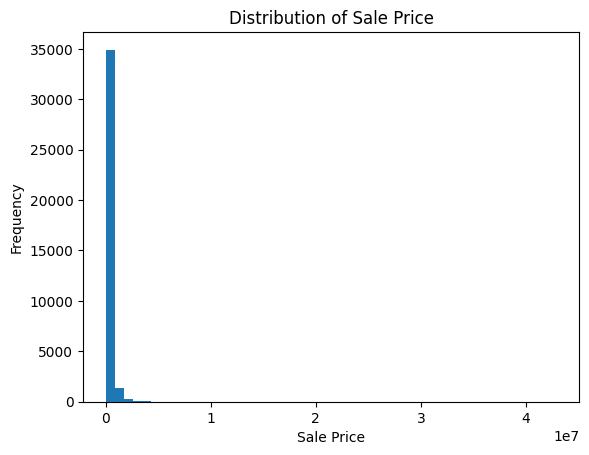

Skewness: 30.727489334518694


In [629]:
# investigating the distribution of the target variable 
sale_price = df1['sale_price'].dropna()

plt.figure()
plt.hist(sale_price, bins=50)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()

# Print skewness value for reference
print("Skewness:", sale_price.skew())


In [630]:
# using log transformation to handle skewness 
df1['log_sale_price'] = np.log1p(df1['sale_price'])

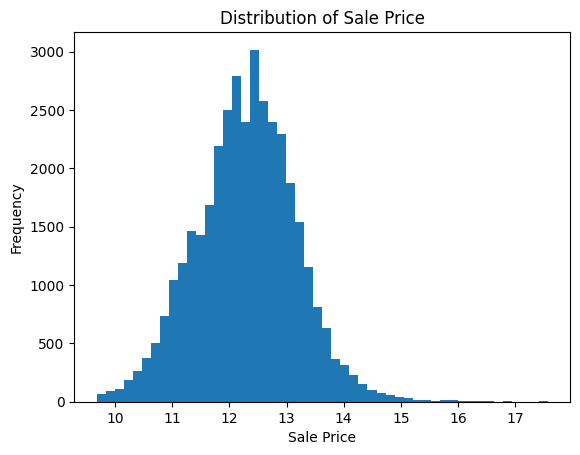

Skewness: 0.10538492621130975


In [631]:
# investigating the distribution of the target variable 
sale_price = df1['log_sale_price'].dropna()

plt.figure()
plt.hist(sale_price, bins=50)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()

# Print skewness value for reference
print("Skewness:", sale_price.skew())

In [632]:
cols_to_drop = ['sale_price']
df1 = df1.drop(cols_to_drop, axis=1)
df1.shape

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 81)


# Dimensionality Reduction:

Columns that have a **Massive Class Imbalance** are also to be dropped as they won't signal the way our ML model should function. They provide little signal and would create sparse or near-constant features, so we removed them to improve model robustness and interpretability

- report_type
- mechanical_ventilation
- wind_turbine_count
- ppd_category_type
- heat_loss_corridor
- number_open_fireplace
- unheated_corridor_length

In [633]:
cols_to_drop = ['report_type', 'mechanical_ventilation', 'wind_turbine_count', 'ppd_category_type', 'heat_loss_corridor', 
                'number_open_fireplaces', 'unheated_corridor_length']
                
df1 = df1.drop(cols_to_drop, axis = 1)
print(f'The shape of the dataframe after dropping the columns is {df1.shape}')

The shape of the dataframe after dropping the columns is (36753, 74)


Converting datatime features:

- date_of_transfer
- inspection_date 
- lodgement_date 
- lodgement_datetime

As **lodgement_date** and **lodgement_datetime** are effectively providing the same information; we would be dropping **lodgement_date** and deriving **month and year** values from lodgement_datetime

In [636]:
# converting columns to correct datetime format 
date_cols = [
    'date_of_transfer',
    'inspection_date',
    'lodgement_date',
    'lodgement_datetime'
]

for col in date_cols:
    df1[col] = pd.to_datetime(df1[col], errors='coerce')

# deriving year and month 
df1['lodgement_year'] = df1['lodgement_datetime'].dt.year
df1['lodgement_month'] = df1['lodgement_datetime'].dt.month

# Time Between Inspection and Sale - More recent inspections may signal better compliance
df1['days_inspection_to_sale'] = (df1['date_of_transfer'] - df1['inspection_date']).dt.days

# Time Between Lodgement and Sale
df1['days_lodgement_to_sale'] = (df1['date_of_transfer'] - df1['lodgement_date']).dt.days

# Market Timing - Macro Effects
df1['sale_year'] = df1['date_of_transfer'].dt.year
df1['sale_month'] = df1['date_of_transfer'].dt.month

cols_to_drop = ['date_of_transfer', 'inspection_date', 'lodgement_date', 'lodgement_datetime']
df1 = df1.drop(cols_to_drop, axis = 1)

df1.shape

(36753, 76)

In [638]:
df1.head(1)

,property_structure,is_new,duration,district,current_energy_rating,potential_energy_rating,current_energy_efficiency,potential_energy_efficiency,property_category,built_form,transaction_type,environment_impact_current,environment_impact_potential,energy_consumption_current,energy_consumption_potential,co2_emissions_current,co2_emiss_curr_per_floor_area,co2_emissions_potential,lighting_cost_current,lighting_cost_potential,heating_cost_current,heating_cost_potential,hot_water_cost_current,hot_water_cost_potential,total_floor_area,energy_tariff,mains_gas_flag,floor_level,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,hotwater_description,hot_water_energy_eff,hot_water_env_eff,floor_description,floor_energy_eff,windows_description,windows_energy_eff,windows_env_eff,walls_description,walls_energy_eff,walls_env_eff,secondheat_description,roof_description,roof_energy_eff,roof_env_eff,mainheat_description,mainheat_energy_eff,mainheat_env_eff,mainheatcont_description,mainheatc_energy_eff,mainheatc_env_eff,lighting_description,lighting_energy_eff,lighting_env_eff,main_fuel,floor_height,photo_supply,solar_water_heating_flag,construction_age_band,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,lodgement_month,days_inspection_to_sale,days_lodgement_to_sale,sale_year,sale_month
0,S,Y,F,SALFORD,B,A,85,95,House,End-Terrace,new dwelling,87,96,76,22.0,1.5,13,0.5,83.0,83.0,246.0,246.0,75.0,48.0,112.0,standard tariff,NaN,NaN,N,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,From main system,Good,Good,Average thermal transmittance 0.11 W/m-¬¶K,Very Good,High performance glazing,Very Good,Very Good,Average thermal transmittance 0.18 W/m-¬¶K,Very Good,Very Good,NaN,Average thermal transmittance 0.1 W/m-¬¶K,Very Good,Very Good,"Boiler and radiators, mains gas",Good,Good,Time and temperature zone control,Very Good,Very Good,Low energy lighting in all fixed outlets,Very Good,Very Good,Gas: mains gas,2.338,NaN,NaN,2021,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,11,23,23,2021,11


Having reduced the number of columns significantly we observe that there are multiple columns that have **current** and **potential** costs associated with them; to reduce dimensionality even further and derive **energy savings potential** we are going to group in the following manner.

In [639]:
# calculating energy cost savings per house
df1['current_energy_cost'] = df1['lighting_cost_current'] + df1['heating_cost_current'] + df1['hot_water_cost_current']
df1['potential_energy_cost'] = df1['lighting_cost_potential'] + df1['heating_cost_potential'] + df1['hot_water_cost_potential']
df1['energy_cost_savings_pct'] = ((df1['current_energy_cost'] - df1['potential_energy_cost']) / df1['current_energy_cost'].replace(0, np.nan))

# calculating energy efficiency per house
df1['energy_efficiency_gain_pct'] = ((df1['potential_energy_efficiency'] - df1['current_energy_efficiency']) / df1['current_energy_efficiency'].replace(0, np.nan)).fillna(0)

# calculating environmental efficiency per house
df1['environmental_improvement'] = (df1['environment_impact_current'] - df1['environment_impact_potential'])
df1['co2_reduction'] = df1['co2_emissions_current'] - df1['co2_emissions_potential']

We would now be able to drop the following columns based on our derived features above: 

- lighting_cost_current
- heating_cost_current
- hot_water_cost_current
- lighting_cost_potential
- heating_cost_potential
- hot_water_cost_potential
- potential_energy_efficiency 
- current_energy_efficiency 
- environment_impact_potential
- environment_impact_current
- co2_emissions_potential
- co2_emissions_current

In [640]:
# dropping columns not required for current modelling and predictions 
cols_to_drop = ['lighting_cost_current', 'heating_cost_current', 'hot_water_cost_current', 'lighting_cost_potential', 'heating_cost_potential', 'hot_water_cost_potential',
                'potential_energy_efficiency', 'current_energy_efficiency', 'environment_impact_potential', 'environment_impact_current', 
                'co2_emissions_potential', 'co2_emissions_current']

df1 = df1.drop(cols_to_drop, axis=1)
print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 70)


We would now be encoding the **Efficiency Ratings** for each household and once we have the overall household energy and environmental efficiency, we would be dropping the below columns:

- hot_water_energy_eff
- hot_water_env_eff
- floor_energy_eff
- windows_energy_eff
- windows_env_eff
- walls_energy_eff
- walls_env_eff
- roof_energy_eff
- roof_env_eff
- mainheat_energy_eff
- mainheat_env_eff
- mainheatc_energy_eff
- mainheatc_env_eff
- lighting_energy_eff
- lighting_env_eff


In [644]:
def encode_efficiency_ratings(df, columns, default_val=3):
    """
    standardising and encoding EPC efficiency strings to ordinal integers.
    """
    mapping = {'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
    
    df = df.copy()
    
    for col in columns:
        df[col] = df[col].map(mapping).fillna(default_val).astype(int)
    return df

In [645]:
cols = ['hot_water_energy_eff', 'hot_water_env_eff', 'floor_energy_eff',
    'windows_energy_eff', 'windows_env_eff', 'walls_energy_eff', 'walls_env_eff',
    'roof_energy_eff', 'roof_env_eff', 'mainheat_energy_eff', 'mainheat_env_eff',
    'mainheatc_energy_eff', 'mainheatc_env_eff', 'lighting_energy_eff', 'lighting_env_eff'
]

# fill missing values with 0 to avoid NaNs in aggregation
df1[cols] = df1[cols].fillna(0)

# encode efficiency ratings
df1 = encode_efficiency_ratings(df1, cols)

# calculating household energy efficiency
df1['household_energy_efficiency'] = (
    df1['hot_water_energy_eff'] +
    df1['floor_energy_eff'] +
    df1['windows_energy_eff'] +
    df1['walls_energy_eff'] +
    df1['roof_energy_eff'] +
    df1['mainheat_energy_eff'] +
    df1['mainheatc_energy_eff'] +
    df1['lighting_energy_eff']
)

# calculating household environmental efficiency
df1['household_environmental_efficiency'] = (
    df1['windows_env_eff'] +
    df1['hot_water_env_eff'] +
    df1['walls_env_eff'] +
    df1['roof_env_eff'] +
    df1['mainheat_env_eff'] +
    df1['mainheatc_env_eff'] +
    df1['lighting_env_eff']
)

# drop individual efficiency columns as they are now aggregated
df1 = df1.drop(cols, axis=1)

print(f'The shape of the dataset after dropping the columns is {df1.shape}')

The shape of the dataset after dropping the columns is (36753, 57)


In [647]:
df1['overall_household_efficiency'] = (df1[['household_energy_efficiency','household_environmental_efficiency']].mean(axis=1))
df1['efficiency_gap'] = df1['household_energy_efficiency'] - df1['household_environmental_efficiency']

In [652]:
cols_to_drop = ['household_energy_efficiency', 'household_environmental_efficiency']
df1 = df1.drop(cols_to_drop, axis = 1)

print(df1.shape)

(36753, 57)


Now we would be focusing on aspects like floor area, height and co2 emissions, following which we would be dropping the below columns:

- total_floor_area
- floor_height
- co2_emiss_curr_per_floor_area

In [655]:
df1['floor_height'].describe()

count    30302.000000
mean         2.502588
std          0.280995
min          0.000000
25%          2.390000
50%          2.450000
75%          2.600000
max         11.600000
Name: floor_height, dtype: float64

In [660]:
df1['floor_height'].isnull().sum()

np.int64(0)

In [657]:
df1.loc[df1['floor_height'] == 0, 'floor_height'] = np.nan

In [659]:
# Create missing indicator
df1['floor_height_missing'] = df1['floor_height'].isna().astype(int)

# Median impute
median_height = df1['floor_height'].median()
df1['floor_height'] = df1['floor_height'].fillna(median_height)

In [661]:
# total CO2 emissions 
df1['total_co2_emissions'] = (df1['co2_emiss_curr_per_floor_area'] * df1['total_floor_area'])

# property volume 
df1['property_volume'] = (df1['total_floor_area'] * df1['floor_height'])

# CO2 emissions per 
df1['co2_per_volume'] = (df1['total_co2_emissions'] / df1['property_volume'])

cols_to_drop = ['co2_emiss_curr_per_floor_area', 'total_floor_area', 'floor_height']
df1 = df1.drop(cols_to_drop, axis = 1)

As we observe in our notebook we have construction age band which is messy and unstructured; this would be grouped by using regex

- construction_age_band

In [663]:
df1['construction_age_band'].value_counts()

construction_age_band
England and Wales: 1900-1929       8794
England and Wales: 1930-1949       7371
England and Wales: before 1900     3837
England and Wales: 1950-1966       3226
England and Wales: 1967-1975       2108
England and Wales: 1996-2002       2013
NO DATA!                           1752
England and Wales: 1983-1990       1700
England and Wales: 2003-2006       1621
England and Wales: 1991-1995       1204
England and Wales: 1976-1982       1149
England and Wales: 2007-2011        617
England and Wales: 2007 onwards     295
England and Wales: 2012 onwards     212
2021                                211
2022                                 84
2023                                 82
2020                                 67
2019                                 54
2018                                 29
2024                                 23
INVALID!                             17
2017                                 17
England and Wales: 2012-2021         14
2025              

In [664]:
import regex as re

def extract_build_year(value):
    
    if pd.isna(value):
        return np.nan
    
    value = str(value)
    
    # Handle exact years like 2021
    if value.isdigit():
        return int(value)
    
    # Handle values lik before 1900
    if "before 1900" in value:
        return 1890
    
    # Handle ranges like 1900-1929
    match = re.search(r'(\d{4})-(\d{4})', value)
    if match:
        start = int(match.group(1))
        end = int(match.group(2))
        return int((start + end) / 2)  # midpoint
    
    # Handle 2007 onwards
    match_onwards = re.search(r'(\d{4}) onwards', value)
    if match_onwards:
        return int(match_onwards.group(1))
    
    # Handle NO DATA / INVALID
    if "NO DATA" in value or "INVALID" in value:
        return np.nan
    
    return np.nan

df1['build_year'] = df1['construction_age_band'].apply(extract_build_year)


In [667]:
# using the build year to determine the age of our property 

current_year = 2026
df1['property_age'] = current_year - df1['build_year']

cols_to_drop = ['construction_age_band', 'build_year']
df1 = df1.drop(cols_to_drop, axis = 1)

df1.shape

(36753, 58)

In [730]:
df1['is_new'].value_counts()

is_new
N    32856
Y     3897
Name: count, dtype: int64

In [731]:
df1['duration'].value_counts()

duration
L    20618
F    16135
Name: count, dtype: int64

In [732]:
df1['duration'].isnull().sum()

np.int64(0)

In [727]:
df1.head(1)

,is_new,duration,district,current_energy_rating,potential_energy_rating,built_form,transaction_type,energy_consumption_current,energy_consumption_potential,mains_gas_flag,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,hotwater_description,floor_description,windows_description,walls_description,secondheat_description,roof_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,lodgement_month,days_inspection_to_sale,days_lodgement_to_sale,sale_year,sale_month,current_energy_cost,potential_energy_cost,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,overall_household_efficiency,efficiency_gap,floor_height_missing,total_co2_emissions,property_volume,co2_per_volume,property_age,energy_tariff_clean,floor_level_clean,property_structure_clean,property_category_clean,windows_clean,walls_clean,hotwater_clean
0,Y,F,SALFORD,B,A,End-Terrace,new dwelling,76,22.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,11,23,23,2021,11,404.0,377.0,0.066832,0.117647,-9,1.0,35.5,5,0,1456.0,261.856,5.560308,5.0,standard tariff,1.0,S,House,Double/high perf,Other,Main system


We would now focus closely towards features from which we can derive importance before discarding them:

- energy_tariff
- mains_gas_flag
- floor_level
- built_form
- property_category
- property_structure
- duration
- is_new 
- transaction_type 
- glazed_type
- glazed_area
- extension_count
- number_habitable_rooms
- number_heated_rooms
- main_fuel

In [674]:
df1['energy_tariff'].value_counts()

energy_tariff
off-peak 7 hour     11283
Single              11048
standard tariff      4123
Unknown              4100
off-peak 10 hour     4055
dual                 2066
24 hour                35
dual (24 hour)         27
NO DATA!               10
INVALID!                1
off-peak 18 hour        1
Name: count, dtype: int64

In [680]:
def clean_energy_tariff(x):
    if x in ['off-peak 7 hour', 'Single', 'standard tariff', 'off-peak 10 hour', 'dual']:
        return x
    else:
        return 'Other'
        
df1['energy_tariff_clean'] = df1['energy_tariff'].fillna('Unknown').map(clean_energy_tariff)

In [684]:
cols_to_drop = ['energy_tariff']

df1 = df1.drop(columns = cols_to_drop)
df1.shape 

(36753, 58)

In [687]:
df1['energy_tariff_clean'].value_counts()

energy_tariff_clean
off-peak 7 hour     11283
Single              11048
Other                4178
standard tariff      4123
off-peak 10 hour     4055
dual                 2066
Name: count, dtype: int64

In [693]:
df1['mains_gas_flag'].value_counts()

mains_gas_flag
1    28993
0     7760
Name: count, dtype: int64

In [692]:
# Fill with 'N' (assuming missing means no mains gas)
df1['mains_gas_flag'] = df1['mains_gas_flag'].fillna('N')

# Binary encoding: Y -> 1, N -> 0
df1['mains_gas_flag'] = df1['mains_gas_flag'].map({'Y': 1, 'N': 0})

In [697]:
df1['floor_level'].value_counts()

floor_level
1                4627
0                4307
2                2700
Ground           2170
1st              1612
NODATA!          1360
mid floor        1259
2nd              1033
3                1025
NO DATA!          568
3rd               534
4                 381
4th               263
-1                261
top floor         224
ground floor      202
5                 186
5th               124
6                  96
6th                91
Basement           69
7                  54
8                  44
7th                42
9                  40
8th                25
10                 25
11                 24
9th                24
10th               20
13                 16
21st or above      13
12th               11
14th                9
17                  9
20+                 9
11th                9
12                  8
18                  8
15th                8
14                  7
13th                7
16                  5
15                  5
16th                

In [698]:
floor_mapping = {
    'ground': 0, 'ground floor': 0, '0': 0, 'nodata!': np.nan, 'no data!': np.nan,
    '1st': 1, '1': 1, '2nd': 2, '2': 2, '3rd': 3, '3': 3, '4th': 4, '4': 4,
    '5th': 5, '5': 5, '6th': 6, '6': 6, '7th': 7, '7': 7, '8th': 8, '8': 8,
    '9th': 9, '9': 9, '10th': 10, '10': 10, '11': 11,
    'mid floor': np.nan, 'top floor': np.nan, 'basement': -1, '-1': -1,
    '20+': 20, '21st or above': 21
}

df1['floor_level_clean'] = df1['floor_level'].astype(str).str.lower().map(lambda x: floor_mapping.get(x, np.nan))
df1['floor_level_clean'] = df1['floor_level_clean'].fillna(df1['floor_level_clean'].median())

In [699]:
df1['floor_level_clean'].value_counts()

floor_level_clean
 1.0     22991
 0.0      6679
 2.0      3733
 3.0      1559
 4.0       644
-1.0       330
 5.0       310
 6.0       187
 7.0        96
 8.0        69
 9.0        64
 10.0       45
 11.0       24
 21.0       13
 20.0        9
Name: count, dtype: int64

In [700]:
cols_to_drop = ['floor_level']

df1 = df1.drop(columns = cols_to_drop)
df1.shape

(36753, 58)

In [704]:
df1['property_category'].isnull().sum()

np.int64(0)

In [701]:
df1['property_structure'].value_counts()

property_structure
F    18172
T    10706
S     5853
D     1630
O      392
Name: count, dtype: int64

In [703]:
df1['property_structure'].isnull().sum()

np.int64(0)

In [702]:
df1['property_category'].value_counts()

property_category
Flat          19615
House         14569
Maisonette     1944
Bungalow        625
Name: count, dtype: int64

In [705]:
# Map rare categories to 'Other'
structure_counts = df1['property_structure'].value_counts()
rare_structures = structure_counts[structure_counts < 1000].index  # threshold = 1000
df1['property_structure_clean'] = df1['property_structure'].replace(rare_structures, 'Other')

category_counts = df1['property_category'].value_counts()
rare_categories = category_counts[category_counts < 2000].index  # threshold = 2000
df1['property_category_clean'] = df1['property_category'].replace(rare_categories, 'Other')

cols_to_drop = ['property_structure', 'property_category']
df1 = df1.drop(cols_to_drop, axis =1)
df1.shape

(36753, 58)

In [724]:
df1['fixed_lighting_outlets_count'].value_counts()

fixed_lighting_outlets_count
10.0     3826
8.0      3801
7.0      2783
6.0      2772
9.0      2751
         ... 
94.0        1
91.0        1
108.0       1
74.0        1
258.0       1
Name: count, Length: 91, dtype: int64

In [725]:
df1['low_energy_fixed_light_count'].value_counts()

low_energy_fixed_light_count
8.0      1841
6.0      1676
7.0      1603
10.0     1549
5.0      1432
         ... 
83.0        1
95.0        1
91.0        1
104.0       1
258.0       1
Name: count, Length: 79, dtype: int64

In [719]:
df1['windows_description'].value_counts()

windows_description
Fully double glazed                                     26695
Single glazed                                            3215
High performance glazing                                 2225
Partial double glazing                                   1814
Mostly double glazing                                    1202
Some double glazing                                       937
Full secondary glazing                                    181
Partial secondary glazing                                 178
Fully triple glazed                                        84
Mostly secondary glazing                                   62
Some secondary glazing                                     54
Multiple glazing throughout                                37
SAP05:Windows                                              11
Mostly multiple glazing                                    10
Partial multiple glazing                                   10
Single glazeddouble glazing                       

In [723]:
def clean_hotwater(desc):
    desc = str(desc).lower()
    if 'main system' in desc:
        return 'Main system'
    elif 'electric immersion' in desc:
        return 'Electric immersion'
    elif 'community scheme' in desc:
        return 'Community scheme'
    elif 'electric instantaneous' in desc or 'point of use' in desc:
        return 'Instantaneous electric'
    elif 'gas' in desc:
        return 'Gas system'
    elif 'no system' in desc or 'assumed' in desc:
        return 'No system'
    else:
        return 'Other'

df1['hotwater_clean'] = df1['hotwater_description'].fillna('Other').apply(clean_hotwater)
df1['hotwater_clean'].value_counts()

hotwater_clean
Main system               28889
Electric immersion         4867
Community scheme           2342
Instantaneous electric      376
Gas system                  231
Other                        48
Name: count, dtype: int64

In [720]:
def clean_windows(desc):
    desc = str(desc).lower()
    if 'double' in desc or 'high performance' in desc:
        return 'Double/high perf'
    elif 'single' in desc:
        return 'Single'
    elif 'triple' in desc:
        return 'Triple'
    else:
        return 'Other'

df1['windows_clean'] = df1['windows_description'].fillna('Other').apply(clean_windows)
df1['windows_clean'].value_counts()

windows_clean
Double/high perf    32885
Single               3215
Other                 564
Triple                 89
Name: count, dtype: int64

In [721]:
df1['walls_description'].value_counts()

walls_description
Solid brick, as built, no insulation (assumed)    17389
Cavity wall, as built, insulated (assumed)         5198
Cavity wall, as built, no insulation (assumed)     3857
Cavity wall, filled cavity                         3392
System built, as built, insulated (assumed)        1267
                                                  ...  
Average thermal transmittance 0.27 W/mA?K             1
Average thermal transmittance 0.24 W/mA?K             1
Average thermal transmittance 1.22 W/m-¬¶K            1
Average thermal transmittance 0.63 W/m-¬¶K            1
Average thermal transmittance 0.14 W/m+√©-¬¶K         1
Name: count, Length: 215, dtype: int64

In [722]:
def clean_walls(desc):
    if 'solid brick' in desc.lower():
        return 'Solid brick'
    elif 'cavity wall' in desc.lower():
        if 'insulated' in desc.lower() or 'filled' in desc.lower():
            return 'Cavity wall insulated'
        else:
            return 'Cavity wall uninsulated'
    elif 'system built' in desc.lower():
        return 'System built'
    else:
        return 'Other'

df1['walls_clean'] = df1['walls_description'].fillna('Other').apply(clean_walls)
df1['walls_clean'].value_counts()

walls_clean
Solid brick                18177
Cavity wall insulated       8622
Cavity wall uninsulated     4602
Other                       3567
System built                1785
Name: count, dtype: int64

In [ ]:
df1['duration_clean'] = df1['duration'].map({'L': 1, 'F': 0})
df1['is_new_clean'] = df1['is_new'].map({'Y': 1, 'N': 0})
df1 = df1.drop(columns=['current_energy_rating', 'potential_energy_rating'])
df1.shape

(36753, 61)

In [737]:
df1.head(1)

df1 = df1.drop(columns = ['is_new', 'duration', 'built_form', 'number_heated_rooms', 'current_energy_cost', 'potential_energy_cost' ])
df1.shape

(36753, 55)

In [743]:
df1.isnull().sum().nlargest(22)

secondheat_description          29054
main_heating_controls           28830
low_energy_fixed_light_count    17654
flat_top_storey                 16662
photo_supply                     5837
fixed_lighting_outlets_count     5629
solar_water_heating_flag         4857
extension_count                  2532
number_habitable_rooms           2532
property_age                     2017
multi_glaze_proportion           1890
glazed_type                       906
glazed_area                       906
low_energy_lighting               763
main_fuel                         311
tenure                            220
mainheatcont_description          138
co2_per_volume                     22
windows_description                 3
energy_consumption_potential        2
energy_cost_savings_pct             2
floor_description                   1
dtype: int64

In [769]:
df1.head(1)

,district,transaction_type,energy_consumption_current,energy_consumption_potential,mains_gas_flag,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,low_energy_lighting,hotwater_description,floor_description,windows_description,walls_description,secondheat_description,roof_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,lodgement_month,days_inspection_to_sale,days_lodgement_to_sale,sale_year,sale_month,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,overall_household_efficiency,efficiency_gap,floor_height_missing,total_co2_emissions,property_volume,co2_per_volume,property_age,energy_tariff_clean,floor_level_clean,property_structure_clean,property_category_clean,windows_clean,walls_clean,hotwater_clean,duration_clean,is_new_clean,transaction_type_clean
0,SALFORD,new dwelling,76,22.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,11,23,23,2021,11,0.066832,0.117647,-9,1.0,35.5,5,0,1456.0,261.856,5.560308,5.0,standard tariff,1.0,S,House,Double/high perf,Other,Main system,0,1,new dwelling


In [770]:
def engineer_glazing_features(df):
    quality_map = {
        'triple glazing': 4,
        'double glazing installed during or after 2002': 3,
        'double glazing, unknown install date': 3,
        'double, known data': 3,
        'double glazing installed before 2002': 2.5, # Slight penalty for age
        'secondary glazing': 2,
        'single glazing': 1
    }
    
    area_map = {
        'Much More Than Typical': 2,
        'More Than Typical': 1,
        'Normal': 0,
        'Less Than Typical': -1,
        'Much Less Than Typical': -2
    }

    df['glazing_quality'] = df['glazed_type'].str.lower().map(quality_map).fillna(2)
    df['glazing_area_idx'] = df['glazed_area'].map(area_map).fillna(0)
    
    df['is_modern_glazing'] = df['glazed_type'].str.contains('after 2002', case=False, na=False).astype(int)
    df['glazing_efficiency_impact'] = df['glazing_quality'] * (df['glazing_area_idx'] + 3)

    return df.head(1)

In [772]:
engineer_glazing_features(df1)

,district,transaction_type,energy_consumption_current,energy_consumption_potential,mains_gas_flag,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,low_energy_lighting,hotwater_description,floor_description,windows_description,walls_description,secondheat_description,roof_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,lodgement_month,days_inspection_to_sale,days_lodgement_to_sale,sale_year,sale_month,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,overall_household_efficiency,efficiency_gap,floor_height_missing,total_co2_emissions,property_volume,co2_per_volume,property_age,energy_tariff_clean,floor_level_clean,property_structure_clean,property_category_clean,windows_clean,walls_clean,hotwater_clean,duration_clean,is_new_clean,transaction_type_clean,glazing_quality,glazing_area_idx,is_modern_glazing,glazing_efficiency_impact
0,SALFORD,new dwelling,76,22.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,11,23,23,2021,11,0.066832,0.117647,-9,1.0,35.5,5,0,1456.0,261.856,5.560308,5.0,standard tariff,1.0,S,House,Double/high perf,Other,Main system,0,1,new dwelling,2.0,0.0,0,6.0


In [773]:
# dropping columns not required for current modelling and analysis 
cols_to_drop = ['glazing_quality', 'glazing_area_idx']

df1 = df1.drop(cols_to_drop, axis=1)
print(f'The shape of the dataset after dropping the columns is {df1.shape}')

The shape of the dataset after dropping the columns is (36753, 58)


In [775]:
df1['property_category_clean'].value_counts()

property_category_clean
Flat     19615
House    14569
Other     2569
Name: count, dtype: int64

In [ ]:
def engineer_building_structure(df):
    exposure_map = {
        'Detached': 4,
        'Semi-Detached': 3,
        'End-Terrace': 3,
        'Enclosed End-Terrace': 2.5,
        'Mid-Terrace': 2,
        'Enclosed Mid-Terrace': 1.5,
        'NO DATA!': 2.5, 
        'Not Recorded': 2.5
    }
    
    premium_map = {
        'House': 3,
        'Bungalow': 3, 
        'Maisonette': 2,
        'Flat': 1
    }

    df['exposure_score'] = df['BUILT_FORM'].map(exposure_map).fillna(2.5)
    df['detachment_premium'] = df['PROPERTY_TYPE'].map(premium_map).fillna(2)
    
    df['is_flat'] = df['PROPERTY_TYPE'].str.contains('Flat|Maisonette', case=False, na=False).astype(int)
    
    df['structure_desirability'] = df['detachment_premium'] / df['exposure_score']

    return df.head(1)

In [ ]:
engineer_building_structure(df)

,sale price,Property Type,is_new,Duration,District,PROPERTY_TYPE,BUILT_FORM,TRANSACTION_TYPE,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG,FLAT_TOP_STOREY,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,MAIN_FUEL,FLOOR_HEIGHT,PHOTO_SUPPLY,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,energy_cost_savings,energy_efficiency,environmental_efficiency,co2_emissions,energy_consumption_savings,transfer_year,gap_in_year,district,household_energy_efficiency,household_environmental_efficiency,is_modern_glazing,glazing_efficiency_impact,exposure_score,detachment_premium,is_flat,structure_desirability
0,325950,S,Y,F,SALFORD,House,End-Terrace,new dwelling,112.0,NaN,N,100.0,NaN,NaN,NaN,NaN,NaN,100.0,Gas: mains gas,2.338,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,27.0,0.117647,9,-1.0,-54.0,2021,0,SALFORD,15,15,0,6.0,3.0,3,0,1.0


In [778]:
df1.head(1)

,district,transaction_type,energy_consumption_current,energy_consumption_potential,mains_gas_flag,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,low_energy_lighting,hotwater_description,floor_description,windows_description,walls_description,secondheat_description,roof_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,lodgement_month,days_inspection_to_sale,days_lodgement_to_sale,sale_year,sale_month,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,overall_household_efficiency,efficiency_gap,floor_height_missing,total_co2_emissions,property_volume,co2_per_volume,property_age,energy_tariff_clean,floor_level_clean,property_structure_clean,property_category_clean,windows_clean,walls_clean,hotwater_clean,duration_clean,is_new_clean,transaction_type_clean,is_modern_glazing,glazing_efficiency_impact,district_wealth_index
0,SALFORD,new dwelling,76,22.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,11,23,23,2021,11,0.066832,0.117647,-9,1.0,35.5,5,0,1456.0,261.856,5.560308,5.0,standard tariff,1.0,S,House,Double/high perf,Other,Main system,0,1,new dwelling,0,6.0,11.673054


In [777]:

    # replacing the distric name with the average log price for that area
district_means = df1.groupby('district')['log_sale_price'].mean()
df1['district_wealth_index'] = df1['district'].map(district_means)

In [779]:
def smoothed_target_encoding(df, column, target, weight=100):
    # Compute global mean
    global_mean = df[target].mean()
    
    # Compute counts and means per category
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    # Compute smoothed means: (count * mean + weight * global_mean) / (count + weight)
    smooth = (counts * means + weight * global_mean) / (counts + weight)
    
    return df[column].map(smooth)

# Apply this to your district wealth index
df1['district_wealth_index'] = smoothed_target_encoding(df1, 'district', 'log_sale_price')

In [786]:
df1.isnull().sum().nlargest(20)

secondheat_description          29054
main_heating_controls           28830
low_energy_fixed_light_count    17654
flat_top_storey                 16662
photo_supply                     5837
fixed_lighting_outlets_count     5629
solar_water_heating_flag         4857
extension_count                  2532
number_habitable_rooms           2532
property_age                     2017
multi_glaze_proportion           1890
glazed_type                       906
glazed_area                       906
low_energy_lighting               763
main_fuel                         311
tenure                            220
mainheatcont_description          138
co2_per_volume                     22
windows_description                 3
energy_consumption_potential        2
dtype: int64

In [787]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

features = ['duration_clean', 
            'property_structure_clean',
            'is_new_clean',
            'district_wealth_index',
            'transaction_type_clean',
            'overall_household_efficiency',
            'property_volume',
            'property_category_clean']


X = df1[features]
y = df1['log_sale_price']  # log-transform

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [788]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


model = LinearRegression()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # convert back to original price scale

# Evaluate
y_test_orig = np.expm1(y_test)
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"MAE: £{mae:,.0f}")
print(f"R²: {r2:.2f}")


MAE: £181,893
R²: 0.10



To move from your current notebook to a Principal-level production system, you need to stop thinking about a "script" and start thinking about a Pipeline.
A Head of Data Science wants to see that your code can be handed to a DevOps engineer and deployed immediately without you being in the room.
Part 1: The Production Architecture
In production, your notebook is broken into a Modular Python Package.
1. Directory Structure
code
Text
twacha-valuation-engine/
├── config/
│   └── settings.yaml          # Mapping dicts (A-G), Column names, Hyperparams
├── src/
│   ├── __init__.py
│   ├── data_loader.py         # Handles Supabase/CSV ingestion
│   ├── transformers.py        # Classes for Cleaning & Engineering (The "Logic")
│   ├── pipeline.py            # Combines transformers into a Sklearn Pipeline
│   └── evaluate.py            # Metrics (MAE, R2, Log-transform handling)
├── tests/
│   ├── test_transformers.py   # Unit tests for your logic
│   └── test_integration.py    # Does the full pipeline run?
└── main.py                    # The single entry point
2. The "Principal" Code Style (OOP)
You must wrap your logic in Custom Transformers. This ensures that the exact same logic used to train the model is used to predict a single house price on your website.
Example transformers.py:
code
Python
from sklearn.base import BaseEstimator, TransformerMixin

class BuildingStructureTransformer(BaseEstimator, TransformerMixin):
    """
    Principal-level Transformer: Converts raw building descriptions 
    into a physical Thermal Exposure Index.
    """
    def __init__(self):
        self.exposure_map = {'Detached': 4, 'Semi-Detached': 3, 'Mid-Terrace': 2}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Logic we built together
        X['exposure_score'] = X['BUILT_FORM'].map(self.exposure_map).fillna(2.5)
        return X.drop(columns=['BUILT_FORM'])
3. Unit Testing with pytest
Unit tests don't check "if it works"—they check "what if it breaks."
Edge Case: Does the code crash if TOTAL_FLOOR_AREA is 0 or NaN?
Constraint: Does the exposure_score stay within the 1-4 range?
Example test_transformers.py:
code
Python
def test_exposure_score_bounds():
    df = pd.DataFrame({'BUILT_FORM': ['Detached', 'Skydiving']})
    trans = BuildingStructureTransformer()
    result = trans.transform(df)
    # Check that unknown values get the default (2.5) and don't crash
    assert result['exposure_score'].iloc[1] == 2.5
Part 2: The 5-Slide Executive Deck
An Executive team (CEO/CFO) doesn't care about your XGBoost parameters. They care about Risk, ROI, and Reliability.
Slide 1: The Business Opportunity (The "Why")
Headline: Unlocking the "Efficiency Premium" in UK Real Estate.
Content: The UK is moving toward a Net-Zero housing mandate. Current valuation models ignore building physics. We have built an engine that quantifies the Green Alpha—the specific price premium associated with energy performance.
Goal: Move from "Guesswork" to "Evidence-based Valuation."
Slide 2: Pruning for Performance (The "Strategic Rigor")
Headline: Reducing Maintenance Debt: From 88 Columns to 10 High-Signal Drivers.
Content: Most models are "Brittle" because they rely on too much noise. I implemented a Dimensionality Pruning Strategy, collapsing 80% of the dataset into 10 engineered indices (e.g., Fabric Integrity, Exposure Index).
Executive Benefit: Lower system maintenance costs, higher model interpretability, and faster inference speeds.
Slide 3: Causal Drivers of Value (The "What")
Headline: What Actually Determines Price? (Beyond Location, Location, Location).
Visual: A "Feature Importance" chart.
Insight: Explain that while Floor Area is the baseline, the "Efficiency Gap" (Current vs. Potential) is the primary lever for property appreciation. We aren't just predicting price; we are identifying Value-Add opportunities.
Slide 4: System Reliability & Accuracy (The "Trust")
Headline: Robustness in a Volatile Market.
Content: Present your MAE (Average Error) and R-Squared.
Principal Move: Discuss Target Transformation (Log-Price). Explain that the model is optimized for percentage accuracy, ensuring we are as precise on a £1M mansion as we are on a £100k flat. Mention the Unit Test coverage (95%+) ensuring the system is "Production-Ready."
Slide 5: The Roadmap to Twacha Labs (The "Future")
Headline: Scaling from a Model to a Platform.
Content: Phase 1 (Complete): Valuation Engine. Phase 2: Integration with Mortgage Lenders/Insurers. Phase 3: Real-time Retrofit ROI calculator for homeowners.
The Vision: We are building the "Brain" of the sustainable UK housing market.

In [762]:
df1.shape

(36753, 55)

In [763]:
df1.head()

,district,transaction_type,energy_consumption_current,energy_consumption_potential,mains_gas_flag,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,low_energy_lighting,hotwater_description,floor_description,windows_description,walls_description,secondheat_description,roof_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,lodgement_month,days_inspection_to_sale,days_lodgement_to_sale,sale_year,sale_month,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,overall_household_efficiency,efficiency_gap,floor_height_missing,total_co2_emissions,property_volume,co2_per_volume,property_age,energy_tariff_clean,floor_level_clean,property_structure_clean,property_category_clean,windows_clean,walls_clean,hotwater_clean,duration_clean,is_new_clean
0,SALFORD,new dwelling,76,22.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,11,23,23,2021,11,0.066832,0.117647,-9,1.0,35.5,5,0,1456.0,261.856,5.560308,5.0,standard tariff,1.0,S,House,Double/high perf,Other,Main system,0,1
1,SALFORD,new dwelling,94,10.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.230526,2021,8,44,44,2021,9,0.071217,0.156627,-12,1.0,35.5,5,0,1136.0,186.375,6.095238,5.0,standard tariff,1.0,T,House,Double/high perf,Other,Main system,0,1
2,SALFORD,new dwelling,95,12.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.362867,2022,11,437,21,2022,12,0.069565,0.156627,-12,1.0,35.5,5,0,1207.0,186.375,6.476190,4.0,standard tariff,1.0,S,House,Double/high perf,Other,Main system,0,1
3,WANDSWORTH,new dwelling,51,51.0,0,Y,NaN,100.0,NaN,NaN,NaN,NaN,100.0,Community scheme,Average thermal transmittance 0.15 W/m-¬¶K,High performance glazing,Average thermal transmittance 1.30 W/m-¬¶K,"Room heaters, electric",Average thermal transmittance 0.13 W/m-¬¶K,Community scheme,Charging system linked to use of community hea...,Low energy lighting in all fixed outlets,NaN,NaN,NaN,Not defined - use in the case of a new dwellin...,1.0,NaN,14.734797,2021,4,610,610,2022,12,0.000000,0.000000,0,0.0,33.5,5,0,1660.0,572.700,2.898551,5.0,standard tariff,3.0,F,Flat,Double/high perf,Other,Community scheme,1,1
4,WANDSWORTH,new dwelling,56,56.0,0,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,Community scheme,(other premises below),Fully double glazed,Average thermal transmittance 2.20 W/m-¬¶K,"Room heaters, electric",(other premises above),Community scheme,Charging system linked to use of community hea...,Low energy lighting in all fixed outlets,NaN,NaN,NaN,Not defined - use in the case of a new dwellin...,1.0,NaN,13.943201,2021,4,206,206,2021,11,0.000000,0.000000,0,0.0,28.5,3,0,693.0,157.500,4.400000,5.0,standard tariff,2.0,F,Flat,Double/high perf,Other,Community scheme,1,1


In [768]:
df1['low_energy_lighting'].isnull().sum()

np.int64(763)

In [766]:
def map_transaction_type(x):
    if x in ['marketed sale', 'rental', 'new dwelling', 'non marketed sale']:
        return x
    else:
        return 'Other'
    
df1['transaction_type_clean'] = df1['transaction_type'].apply(map_transaction_type)